In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\krist\OneDrive\Desktop\CareerFoundry\Data Immersion\Achievement 6\01-02-25 Airbnb Amsterdam'

In [4]:
df_listings=pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data',  'listings_cleaned.csv'))

In [5]:
df_listings.columns

Index(['Unnamed: 0', 'listings_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price_per_night', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df_listings = df_listings.drop(columns = ['Unnamed: 0'])
df_listings = df_listings.drop(columns = ['name'])
df_listings = df_listings.drop(columns = ['host_name'])
df_listings = df_listings.drop(columns = ['neighbourhood'])
df_listings = df_listings.drop(columns = ['room_type'])
df_listings = df_listings.drop(columns = ['last_review'])

In [7]:
df_listings.columns

Index(['listings_id', 'host_id', 'latitude', 'longitude', 'price_per_night',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [8]:
df_listings.head()

,listings_id,host_id,latitude,longitude,price_per_night,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,3159,52.365755,4.941419,59,3,248,2.10,1,44
1,3209,3806,52.390225,4.873924,160,4,42,1.03,1,47
2,20168,59484,52.365087,4.893541,80,1,233,2.18,2,198
3,25428,56142,52.373114,4.883668,125,14,1,0.09,2,141
4,27886,97647,52.386727,4.892078,150,2,171,2.03,1,199


In [9]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

This number minimizes within-cluster variance while maintaining well-separated groups.

In [10]:
score = [kmeans[i].fit(df_listings).score(df_listings) for i in range(len(kmeans))]

In [11]:
score

[-6.540014365820291e+19,
 -1.6483093773101957e+19,
 -7.827929089825284e+18,
 -4.71213119734826e+18,
 -3.2946589681282406e+18,
 -2.7090379411426954e+18,
 -2.1764767789237376e+18,
 -1.7696729649640865e+18,
 -1.5942307278769172e+18]

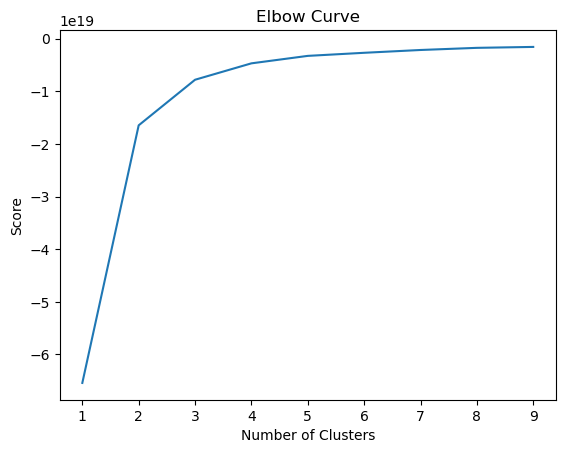

In [12]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [13]:
kmeans = KMeans(n_clusters = 3) 


In [14]:
kmeans.fit(df_listings)

KMeans(n_clusters=3)

In [15]:
df_listings['clusters'] = kmeans.fit_predict(df_listings)

In [16]:
df_listings.head()

,listings_id,host_id,latitude,longitude,price_per_night,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,2818,3159,52.365755,4.941419,59,3,248,2.10,1,44,1
1,3209,3806,52.390225,4.873924,160,4,42,1.03,1,47,1
2,20168,59484,52.365087,4.893541,80,1,233,2.18,2,198,1
3,25428,56142,52.373114,4.883668,125,14,1,0.09,2,141,1
4,27886,97647,52.386727,4.892078,150,2,171,2.03,1,199,1


In [17]:
df_listings['clusters'].value_counts()

clusters
1    12944
0     4460
2     2626
Name: count, dtype: int64

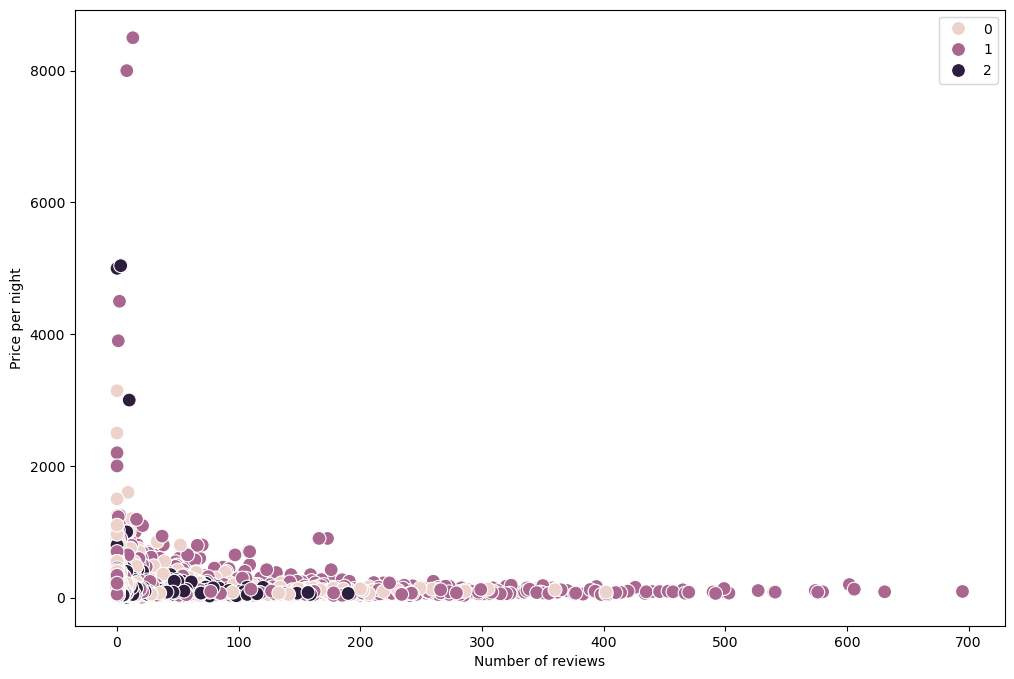

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_listings['number_of_reviews'], y=df_listings['price_per_night'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of reviews') 
plt.ylabel('Price per night') 
plt.show()

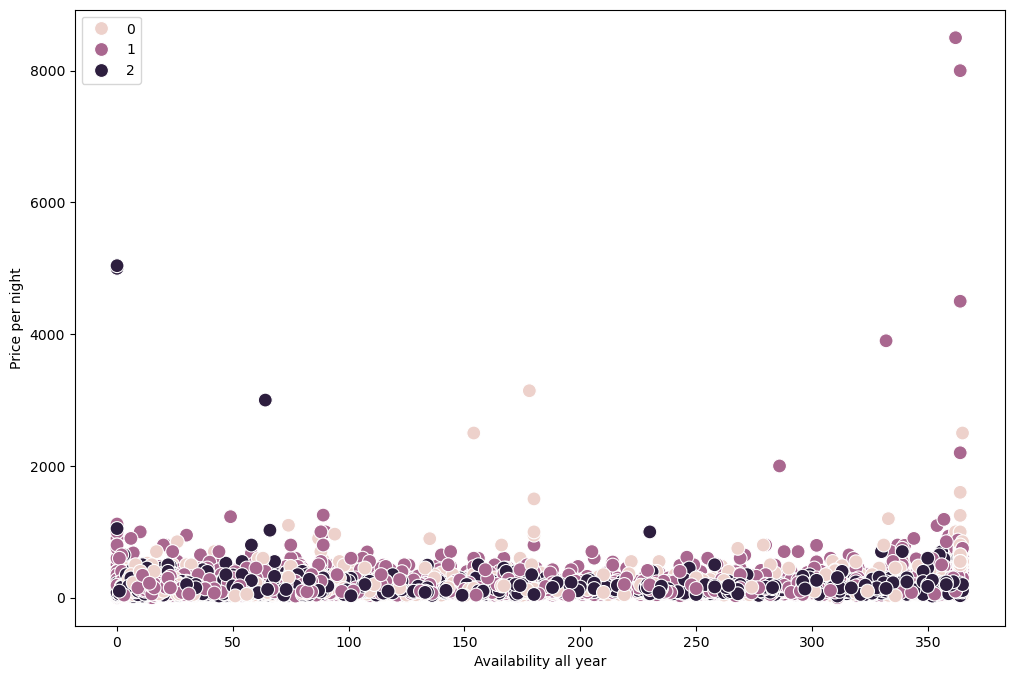

In [26]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_listings['availability_365'], y=df_listings['price_per_night'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Availability all year') 
plt.ylabel('Price per night') 
plt.show()

<Figure size 1200x800 with 0 Axes>

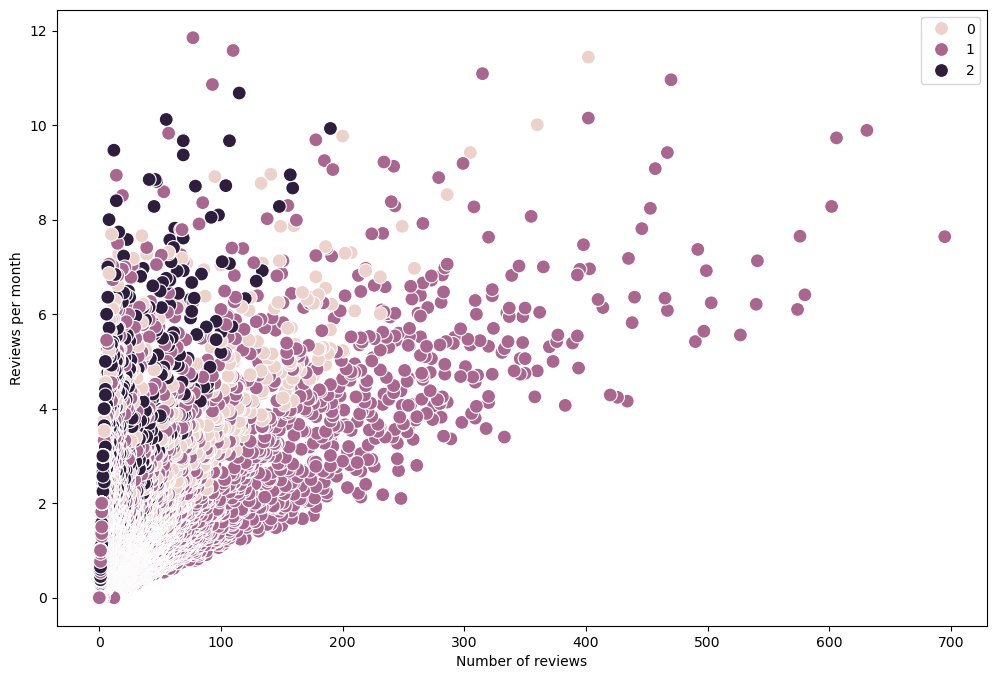

In [28]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_listings['number_of_reviews'], y=df_listings['reviews_per_month'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Number of reviews')
plt.ylabel('Reviews per month') 
plt.show()

Price vs. Number of Reviews:

Cluster 0: Represents properties with higher prices and relatively fewer reviews, likely indicating luxury or niche listings.
Cluster 1: Represents properties with moderate prices and moderate reviews, possibly more standard or widely available options.
Cluster 2: Represents properties with low prices and high numbers of reviews, indicating budget-friendly or popular options.


Price vs. Availability:

Cluster 0 and Cluster 1 capture properties with differing price ranges and availability, potentially highlighting differences in seasonal or year-round demand.
Cluster 2 tends to group listings with lower prices but varying availability, aligning with budget or high-demand properties.

Reviews per Month vs. Number of Reviews:

Cluster 2 stands out for higher review counts, suggesting popular, frequently booked properties.
Cluster 0 and Cluster 1 diverge in review intensity, possibly reflecting differences in property types or market segments.

In [32]:
df_listings.loc[df_listings['clusters'] == 2, 'cluster'] = 'dark purple'
df_listings.loc[df_listings['clusters'] == 1, 'cluster'] = 'purple'
df_listings.loc[df_listings['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
df_listings.groupby('cluster').agg({'number_of_reviews':['mean', 'median'], 
                         'price_per_night':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'reviews_per_month':['mean', 'median']})

number_of_reviews        price_per_night        availability_365  \
                         mean median            mean median             mean   
cluster                                                                        
dark purple          9.959254    4.0      157.540366  134.0        72.589109   
pink                16.819507    7.0      151.581614  125.0        54.775112   
purple              25.547590   10.0      151.300525  125.0        59.112716   

                   reviews_per_month         
            median              mean median  
cluster                                      
dark purple   14.0          1.326641   0.74  
pink           0.0          0.913278   0.49  
purple         3.0          0.862262   0.48

The clustering results can be used to optimize pricing strategies, personalize marketing campaigns, and tailor recommendations for different customer segments. Additionally, these insights can guide property owners to improve listings, identify market gaps, and forecast demand trends to enhance overall business performance.